# OpenDataTools 支持世界杯比赛数据

In [1]:
# 导入worldcup接口
from opendatatools import worldcup

# 注：数据来源 - kaggle

In [2]:
# 加载原始数据
worldcup.set_proxies({"https" : "https://127.0.0.1:1080"})
worldcup.load_data()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA
5,1930,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3,0,Mexico,,9249,1,0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201,1095,CHI,MEX
6,1930,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4,0,Bolivia,,18306,0,0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201,1092,YUG,BOL
7,1930,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3,0,Paraguay,,18306,2,0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201,1097,USA,PAR
8,1930,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1,0,Peru,,57735,0,0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201,1099,URU,PER
9,1930,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1,0,France,,2000,0,0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201,1094,CHI,FRA


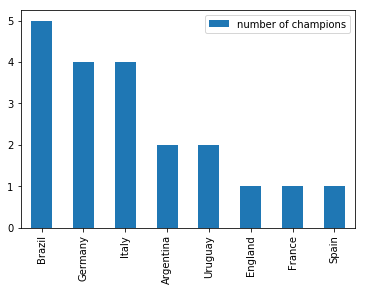

In [16]:
# 夺冠次数排名
df_chanpion = worldcup.get_champion_rank()
df_chanpion.plot.bar()

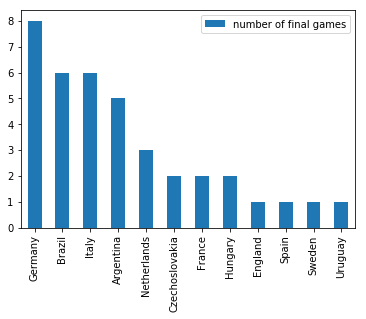

In [15]:
# 参加冠亚军决赛次数排名
df_finalgame = worldcup.get_finalgame_rank()
df_finalgame.plot.bar()

In [44]:
df_finalgame

,number of final games
Germany,8
Brazil,6
Italy,6
Argentina,5
Netherlands,3
Czechoslovakia,2
France,2
Hungary,2
England,1
Spain,1


In [19]:
# 统计进入决赛获得冠军的几率
import pandas as pd
df = pd.concat([df_finalgame, df_chanpion], axis=1)
df.fillna(0, inplace=True)
df['number of champions'] = df['number of champions'].apply(lambda x: int(x))
df['champion rate'] = df['number of champions'] / df['number of final games']
df.sort_values('champion rate', inplace=True)
df

,number of final games,number of champions,champion rate
Czechoslovakia,2,0,0.000000
Hungary,2,0,0.000000
Netherlands,3,0,0.000000
Sweden,1,0,0.000000
Argentina,5,2,0.400000
France,2,1,0.500000
Germany,8,4,0.500000
Italy,6,4,0.666667
Brazil,6,5,0.833333
England,1,1,1.000000


In [6]:
# 获胜场次排名
df = worldcup.get_wingame_rank()
df.head(20)

,number of win games
Brazil,73
Germany,68
Italy,46
Argentina,44
France,30
Spain,30
Netherlands,28
England,26
Uruguay,21
Sweden,17


In [7]:
# 参加场次排名
df = worldcup.get_game_rank()
df.head(20)

,number of games
Germany,106
Brazil,104
Italy,83
Argentina,77
England,62
France,59
Spain,59
Mexico,53
Uruguay,51
Netherlands,50


In [8]:
# 参加届数排名
df = worldcup.get_year_rank()
df.head(20)

,number of year
Brazil,20
Germany,18
Italy,18
Argentina,16
Mexico,15
England,14
Spain,14
France,14
Uruguay,12
Belgium,12


In [45]:
# 进球统计
df = worldcup.get_goal_stat()
df.set_index('year', inplace=True)
df

,avg_goal,games,goal
year,,,
1934,4.117647,17,70
1938,4.666667,18,84
1950,4.000000,22,88
1954,5.384615,26,140
1958,3.600000,35,126
1962,2.781250,32,89
1966,2.781250,32,89
1970,2.968750,32,95
1974,2.552632,38,97


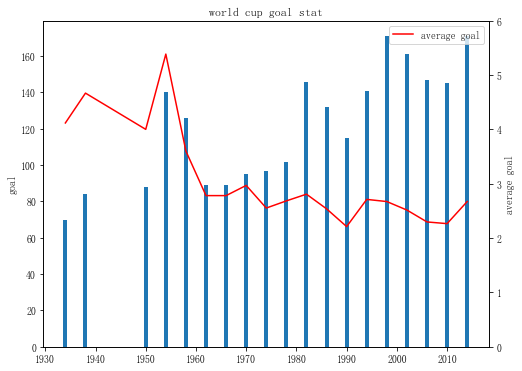

In [47]:
# 导入python画图库matplotlib
import matplotlib.pyplot as plt  

# 设置图片大小
fig = plt.figure(figsize=(8,6))

# 画柱状图
ax1 = fig.add_subplot(1,1,1)
ax1.bar(df.index, df['goal'])
ax1.set_ylabel('goal')

# 画折线图
ax2 = ax1.twinx()
ax2.plot(df.index, df['avg_goal'], color='red', label='average goal')
ax2.legend(loc='upper right')
ax2.set_ylabel('average goal')
ax2.set_ylim(0, 6)

# 标识标题及坐标轴信息
plt.title('world cup goal stat')

# 显示画图结果
plt.show()


In [30]:
# 冠军进球统计
df = worldcup.get_champion_goal_stat()
df.set_index('year', inplace=True)
df

,avg_goal,avg_lose,champion,games,goal,lose
year,,,,,,
1930,3.750000,0.750000,Uruguay,4,15,3
1934,2.400000,0.600000,Italy,5,12,3
1938,2.750000,1.250000,Italy,4,11,5
1950,3.750000,1.250000,Uruguay,4,15,5
1954,4.166667,2.333333,Germany,6,25,14
1958,2.666667,0.666667,Brazil,6,16,4
1962,2.333333,0.833333,Brazil,6,14,5
1966,1.833333,0.500000,England,6,11,3
1970,3.166667,1.166667,Brazil,6,19,7


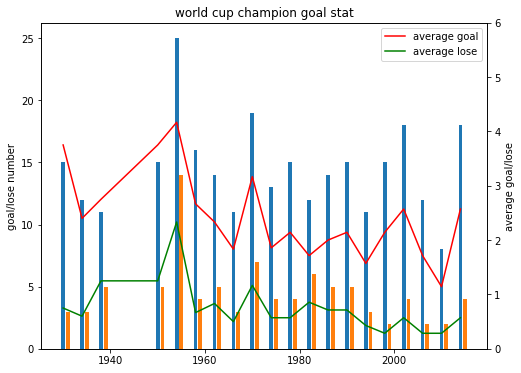

In [37]:
# 导入python画图库matplotlib
import matplotlib.pyplot as plt  

# 设置图片大小
fig = plt.figure(figsize=(8,6))

# 画柱状图
ax1 = fig.add_subplot(1,1,1)
ax1.bar(df.index, df['goal'], label='goal')
ax1.bar(df.index + 1, df['lose'], label='lose')
ax1.set_ylabel('goal/lose number')

# 画折线图
ax2 = ax1.twinx()
ax2.plot(df.index, df['avg_goal'], color='red',   label='average goal')
ax2.plot(df.index, df['avg_lose'], color='green', label='average lose')
ax2.legend(loc='upper right')
ax2.set_ylabel('average goal/lose')
ax2.set_ylim(0, 6)

# 标识标题及坐标轴信息
plt.title('world cup champion goal stat')

# 显示画图结果
plt.show()

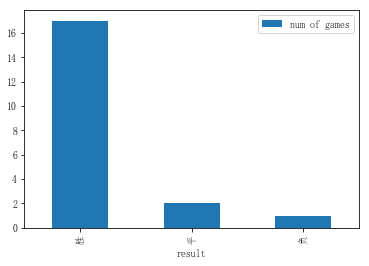

In [43]:
from matplotlib.pylab import mpl
# 指定默认字体
mpl.rcParams['font.sans-serif'] = ['FangSong'] 
# 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['axes.unicode_minus'] = False 


# 冠军球队第一场比赛的情况统计
df_stat, df_detail = worldcup.get_champion_fistgame_stat()
df_stat.set_index('result', inplace=True)

df_stat.plot.bar()

In [12]:
df_detail.sort_values('year')

,result,score,team1,team2,year
0,胜,1 : 0,Uruguay,Peru,1930
1,胜,7 : 1,Italy,USA,1934
2,胜,2 : 1,Italy,Norway,1938
19,胜,8 : 0,Uruguay,Bolivia,1950
3,胜,4 : 1,Germany,Turkey,1954
4,胜,3 : 0,Brazil,Austria,1958
5,胜,2 : 0,Brazil,Mexico,1962
6,平,0 : 0,England,Uruguay,1966
7,胜,4 : 1,Brazil,Czechoslovakia,1970
8,胜,1 : 0,Germany,Chile,1974
